In [35]:
import pathlib
import csv

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:


def thang(TRAITS,POPSIZE):
    means = [2 for _ in range(TRAITS)]
    stds = [1 for _ in range(TRAITS)]
    raw_scores = [[np.random.normal(p[0],p[1]) for p in zip(means, stds)] for _ in range(POPSIZE)]
    scores = sorted([sum(x)/len(x) for x in raw_scores])
    return scores

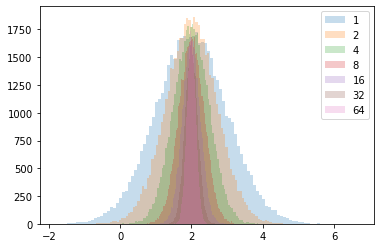

In [3]:

for traits in [1,2,4,8,16,32,64]:
    plt.hist(thang(traits,50000),bins=100,alpha=0.25,label=traits)
plt.legend()
plt.show()

In [104]:
def Fa(x):
    return x

def Fb(x):
    return -0.1*x

def C(x, la, lb):
    ca = 0
    cb = 0
    while x >= la+lb:
        ca += 1
        cb += 1
        x -= la+lb
    if x >= la:
        ca += 1
        x -= la
    return ca, cb, x

def F(x):
    la = 2
    lb = 1.5
    ca, cb, d = C(x, la, lb)
    if ca == cb:
        return Fa(ca*la + d) + Fb(cb*lb)
    else:
        return Fa(ca*la) + Fb(cb*lb + d)
    
for i in range(500):
    print(F(2 + i/10))

2.0
1.99
1.98
1.97
1.96
1.95
1.94
1.93
1.92
1.91
1.9
1.89
1.88
1.87
1.86
1.85
1.9500000000000002
2.0500000000000003
2.15
2.25
2.35
2.4499999999999997
2.5500000000000003
2.65
2.7500000000000004
2.85
2.9499999999999997
3.0500000000000003
3.15
3.2500000000000004
3.35
3.4499999999999997
3.5500000000000003
3.65
3.7500000000000004
3.85
3.84
3.83
3.82
3.81
3.8
3.79
3.78
3.77
3.76
3.75
3.74
3.73
3.72
3.71
3.7
3.8
3.9000000000000004
4.0
4.1000000000000005
4.2
4.3
4.4
4.5
4.6000000000000005
4.7
4.8
4.8999999999999995
5.000000000000001
5.1000000000000005
5.2
5.3
5.3999999999999995
5.500000000000001
5.6000000000000005
5.7
5.69
5.68
5.67
5.66
5.65
5.64
5.63
5.62
5.61
5.6
5.59
5.58
5.57
5.56
5.55
5.6499999999999995
5.749999999999999
5.8500000000000005
5.95
6.05
6.1499999999999995
6.249999999999999
6.3500000000000005
6.45
6.55
6.6499999999999995
6.749999999999999
6.8500000000000005
6.95
7.05
7.1499999999999995
7.249999999999999
7.3500000000000005
7.45
7.55
7.54
7.53
7.52
7.51
7.5
7.49
7.48
7.47
7.46


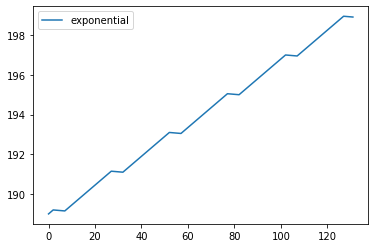

In [5]:
x = [i/10 for i in range(2550)]
y1 = [F(i) for i in x]
c=10
my1 = max(y1)
y2 = [i for i in y1 if i >= my1-c]

# plt.plot(x,y1,label="linear")
plt.plot(y2,label="exponential")
# plt.yscale('log')
plt.legend()
plt.show()

In [6]:
a = 2**10

In [7]:
import pathlib
import csv

import matplotlib.pyplot as plt

In [36]:
def get_data(path,cond,rep,file,column, no_cast=False): 
    data = []
    key = None
    
    files = pathlib.Path(path).glob("*{}*/{}/{}.csv".format(cond,rep,file)) # added * on front to be compatable
    files = [str(f) for f in files]
    if len(files) == 0:                                                           # with named jobs
        print("ERROR: missing file at {} {} {} {}".format(path,cond,rep,file))
        return None
    file = files[0]                                       
    with open(file, 'r') as dataFile:
        csvReader = csv.reader(dataFile)
        for row_i, row_d in enumerate(csvReader):
            if row_i == 0:
                try:
                    key = row_d.index(column)
                except:
                    print("ERROR: column \"{}\" doesn't exist in {}".format(column, file))
                    return None
                continue
            data.append(row_d[key])
    if no_cast:
        return data
    else:
        return list(map(float, data))

# test_x = get_data("../Data/fitness_fns","C00","101","pop","update")
# test_y = get_data("../Data/fitness_fns","C00","101","pop","score_AVE")

In [37]:
def get_structures(path):
    C = []
    R = []
    F = []
    H = {}
    firstC=True
    conditions = pathlib.Path(path).glob("*")
    for cond_i, condition in enumerate(conditions):
        c = str(condition).split("__")[0].split("/")[-1]
        if c[0] != 'C': continue
#         if 'C' not in c: continue # HACK! the previous line only works when there are no prefix on the cond names
        C.append(c)
        if firstC:
            firstC=False
            replicates = condition.glob("*")
            for rep_i, replicate in enumerate(replicates):
                r = str(replicate).split("/")[-1]
                R.append(r)
                if rep_i == 0:
                    files = replicate.glob("*")
                    for file in files:
                        f = str(file).split("/")[-1].split(".")[0]
                        F.append(f)

                        with open(file, 'r') as dataFile:
                            csvReader = csv.reader(dataFile)
                            for row_i, row_d in enumerate(csvReader):
                                if row_i == 0:
                                    H[f] = row_d
                                    break
    return sorted(C),sorted(R),sorted(F),H


# C,R,F,H = get_structures("../Data/fitness_fns")
# print(C)
# print(R)
# print(F)
# print(H)


In [3]:
def Fa(x):
    return x

def Fb(x):
    return -0.1*x

def C(x, la, lb):
    ca = 0
    cb = 0
    while x >= la+lb:
        ca += 1
        cb += 1
        x -= la+lb
    if x >= la:
        ca += 1
        x -= la
    return ca, cb, x

def F(x):
    la = 2
    lb = 0.6
    ca, cb, d = C(x, la, lb)
    if ca == cb:
        return Fa(ca*la + d) + Fb(cb*lb)
    else:
        return Fa(ca*la) + Fb(cb*lb + d)

Cm,Rm,_,_ = get_structures("../MABE/")
print(Cm)
print(Rm)

la = 2
lb = 0.6
GENS = 100000

lbh = [0.6]

for ci, c in enumerate(Cm):
    print("COND", c)
    

    holds_all_reps = []
    for r in Rm:
        allNames = []
        names = []
        ty = get_data("../MABE/",c,r,"LOD_data","mean_AVE")
        ascent_counts = [0 for _ in range(len(ty))] #hard coded to generations
        for name in ["A::", "B::", "C::", "D::", "E::", "F::","G::","H::","I::","J::","K::","L::","M::","N::","O::","P::","Q::","R::","S::","T::","U::","V::","W::","X::","Y::","Z::"]:
            y = get_data("../MABE/",c,r,"LOD_data",name+"mean_AVE")
            if not y is None:
                names.append(name)
                allNames.append(y)
            
        test = zip(*allNames) #nicely puts each update side-by-side so all traits are together in one line

        for u, update in enumerate(test):
            l =  len(update)
            for i in range(l):
                ca, cb, d = C(update[i], la, lb)
                if ca == cb and 0.3 < d < 1.7: 
                    ascent_counts[u] += 1
        transition_counts = {}      
        for h in range(1,len(ascent_counts)):
            prev = ascent_counts[h-1]
            curr = ascent_counts[h]
            key = str(prev)+"->"+str(curr)
            if not key in transition_counts:
                transition_counts[key] = 1
            else:
                transition_counts[key] += 1
                
        holds_all_reps.append(transition_counts)
    cond_average_transitions = {}
    for rep_data in holds_all_reps:
        for key in rep_data:
            if key in cond_average_transitions:
                cond_average_transitions[key] += rep_data[key]
            else:
                cond_average_transitions[key] = rep_data[key]
    
    for key in cond_average_transitions:
            cond_average_transitions[key] /= len(Rm)
         
    for s in range(17):
        ssum = 0
        for key in cond_average_transitions:
            state = key.split("->")[0]
            if int(state) == s:
                ssum += cond_average_transitions[key]
        for key in cond_average_transitions:
            state = key.split("->")[0]
            if int(state) == s:
                cond_average_transitions[key] /= ssum
            
    plot_names = []
    plot_data = []
    for key in sorted(cond_average_transitions, key=lambda x: int(x.split("->")[0])):
        if key in ["0->1","1->2","2->3","3->4","4->5","5->6","6->7","7->8","8->9","9->10","10->11","11->12","12->13","13->14","14->15","15->16"]:
            plot_data.append(cond_average_transitions[key])
            plot_names.append(key)
    plt.figure(figsize=(10,5))
    plt.bar(plot_names,plot_data)

    
    plot_names = []
    plot_data = []
    for key in sorted(cond_average_transitions, key=lambda x: int(x.split("->")[0])):
        if key in ["1->0","2->1","3->2","4->3","5->4","6->5","7->6","8->7","9->8","10->9","11->10","12->11","13->12","14->13","15->14","16->15"]:
            plot_data.append(cond_average_transitions[key])
            plot_names.append(key)
    plt.bar(plot_names,plot_data, color="red")

    
    plot_names = []
    plot_data = []
    for key in sorted(cond_average_transitions, key=lambda x: int(x.split("->")[0])):
        if key in ["0->0","1->1","2->2","3->3","4->4","5->5","6->6","7->7","8->8","9->9","10->10","11->11","12->12","13->13","14->14","15->15","16->16"]:
            plot_data.append(cond_average_transitions[key])
            plot_names.append(key)
    plt.bar(plot_names,plot_data, color="green")
    
    
    plt.xticks(rotation=45)
    plt.yscale("log")
#     plt.savefig("./BEACON_{}.png".format(c))
    plt.show()
    

NameError: name 'get_structures' is not defined

In [69]:
from random import random
flip_rate = 0.03
flip_period = 28

num_coins = 16
generations = 100000
replicates = 500

for r in range(replicates):
    is_flipped = [0 for _ in range(num_coins)]
    num_flipped_record = []

    for g in range(generations):
        for coin in range(num_coins):
            if is_flipped[coin] > 0:
                is_flipped[coin] -= 1
            else:
                if random() < flip_rate:
                    is_flipped[coin] = flip_period
        num_flipped = sum([1 for c in is_flipped if c > 0])
        num_flipped_record.append(num_flipped)

    with open("Cfake/{}/null_model.csv".format(r), 'w') as outputFile:
        outputFile.write("update,num_flipped\n")
        for u,nf in enumerate(num_flipped_record):
            outputFile.write("{},{}\n".format(u,nf))
print("DONE")

DONE


['Cfake'] ['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '224', '225', '226', '227', 

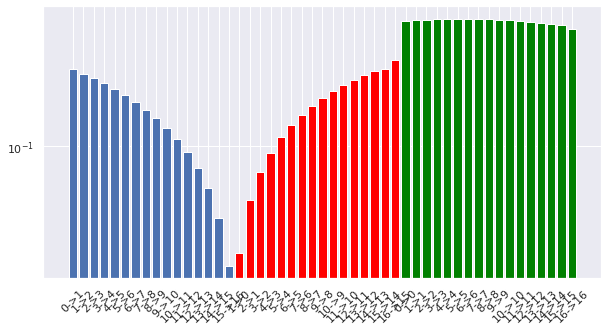

0.16201296855357888


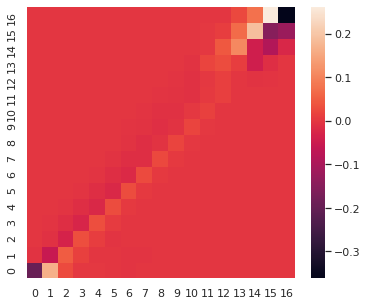

In [84]:


def Fa(x):
    return x

def Fb(x):
    return -0.1*x

def C(x, la, lb):
    ca = 0
    cb = 0
    while x >= la+lb:
        ca += 1
        cb += 1
        x -= la+lb
    if x >= la:
        ca += 1
        x -= la
    return ca, cb, x

def F(x):
    la = 2
    lb = 0.5
    ca, cb, d = C(x, la, lb)
    if ca == cb:
        return Fa(ca*la + d) + Fb(cb*lb)
    else:
        return Fa(ca*la) + Fb(cb*lb + d)

Cm,Rm,_,_ = get_structures(".")
print(Cm, Rm)

la = 2
GENS = 100000

lbh = [0.5,1.0,1.5,2.0,2.5]
numtaskh=[2,4,8,16]

for ci, c in enumerate(Cm):
    print("COND", c)
    numtasks = 16
    

    holds_all_reps = []
    for r in Rm:
        allNames = []
        names = []
        ascent_counts = list(map(int,get_data(".",c,r,"null_model","num_flipped")))
        
        transition_counts = {}      
        for h in range(1,len(ascent_counts)):
            prev = ascent_counts[h-1]
            curr = ascent_counts[h]
            key = str(prev)+"->"+str(curr)
            if not key in transition_counts:
                transition_counts[key] = 1
            else:
                transition_counts[key] += 1
                
        holds_all_reps.append(transition_counts)
        
    cond_average_transitions = {}
    for rep_data in holds_all_reps:
        for key in rep_data:
            if key in cond_average_transitions:
                cond_average_transitions[key] += rep_data[key]
            else:
                cond_average_transitions[key] = rep_data[key]
    
    for key in cond_average_transitions:
            cond_average_transitions[key] /= len(Rm)
            
    for s in range(17): #NORMALIZATION LOOP
        ssum = 0
        for key in cond_average_transitions:
            state = key.split("->")[0]
            if int(state) == s:
                ssum += cond_average_transitions[key]
        for key in cond_average_transitions:
            state = key.split("->")[0]
            if int(state) == s:
                cond_average_transitions[key] /= ssum
            
    plot_names = []
    plot_data = []
    for key in sorted(cond_average_transitions, key=lambda x: int(x.split("->")[0])):
        if key in ["0->1","1->2","2->3","3->4","4->5","5->6","6->7","7->8","8->9","9->10","10->11","11->12","12->13","13->14","14->15","15->16"]:
            plot_data.append(cond_average_transitions[key])
            plot_names.append(key)
    plt.figure(figsize=(10,5))
    plt.bar(plot_names,plot_data)

    
    plot_names = []
    plot_data = []
    for key in sorted(cond_average_transitions, key=lambda x: int(x.split("->")[0])):
        if key in ["1->0","2->1","3->2","4->3","5->4","6->5","7->6","8->7","9->8","10->9","11->10","12->11","13->12","14->13","15->14","16->15"]:
            plot_data.append(cond_average_transitions[key])
            plot_names.append(key)
    plt.bar(plot_names,plot_data, color="red")

    
    plot_names = []
    plot_data = []
    for key in sorted(cond_average_transitions, key=lambda x: int(x.split("->")[0])):
        if key in ["0->0","1->1","2->2","3->3","4->4","5->5","6->6","7->7","8->8","9->9","10->10","11->11","12->12","13->13","14->14","15->15","16->16"]:
            plot_data.append(cond_average_transitions[key])
            plot_names.append(key)
    plt.bar(plot_names,plot_data, color="green")
    
    
    
    
    plt.xticks(rotation=45)
    plt.yscale("log")
#     plt.savefig("./BEACON_{}NORM.png".format(c))
    plt.show()
    
    
    M = [[0 for _ in range(numtasks+1)] for _ in range(numtasks+1)]
    Mlog = [[0 for _ in range(numtasks+1)] for _ in range(numtasks+1)]

    for key in cond_average_transitions:
        [From,To] = key.split("->")
        M[int(From)][int(To)] = cond_average_transitions[key]
        Mlog[int(From)][int(To)] = np.log2(cond_average_transitions[key])
#     print(M)
    
    A = np.array(M)
#     print(A)
    N = []
    with open("pop_66_markov_main_exp_C09.csv", 'r') as fileB:
        for row in fileB:
            N.append(list(map(float,row.strip().split(","))))
    B = np.array(N)
#     print(B)
    C = np.subtract(A,B)
    D = np.multiply(C,C)
    E = np.linalg.norm(D)
    print(E)
#     with open("{}_markov_data.csv".format(c), 'w') as outputFile:
#         for row in M:
#             outputFile.write(",".join(map(str,row)) + "\n")
                
    
    plt.figure(figsize=(6,5))
    ax = sns.heatmap(C)
    ax.set_ylim([0,numtasks+1]) # fixes seaborn axes
    plt.show()

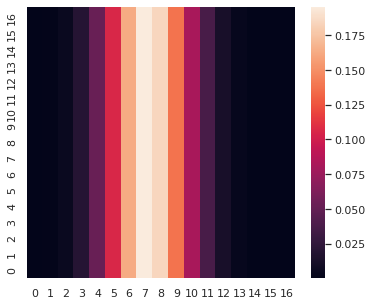

DONE


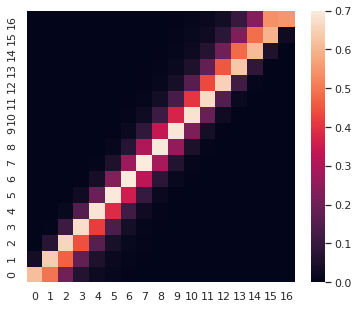

In [100]:
# generate steady-state probabilities
plt.figure(figsize=(6,5))
XX = deepcopy(A)
for _ in range(10):
    XX = np.dot(XX,XX)
ax = sns.heatmap(XX)
ax.set_ylim([0,numtasks+1]) # fixes seaborn axes
plt.show()


#generate probabilities for future passage
def FirstPassageTime(P,n):
    F = deepcopy(P)
    FF = deepcopy(P)
    for _ in range(n):
        for i in range(len(P)):
            for j in range(len(P)):
                s = 0
                for k in range(len(P)):
                    if k != j:
                        s += P[i][k]*F[k][j]
                FF[i][j] = s
        F = deepcopy(FF)
    return F

plt.figure(figsize=(6,5))
XX = deepcopy(A)
YY = np.zeros(XX.shape)

for n in range(10):
    XX = FirstPassageTime(XX,n)
    YY = np.add(XX,YY)
#     ax = sns.heatmap(XX)
#     ax.set_ylim([0,numtasks+1]) # fixes seaborn axes
#     print("n =",n)
#     plt.show()
print("DONE")
ax = sns.heatmap(YY)
ax.set_ylim([0,numtasks+1]) # fixes seaborn axes
plt.show()   
    
